# **Evaluation of Model Dimentions**  

(d_model, num_heads, dff)  
  
  

## **Contents**
1. [Importing Libraries](evaluation_of_feature_enhancement.ipynb#1-importing-libraries)  
   
2. [Load Results](evaluation_of_feature_enhancement.ipynb#2-load-results)  
   
3. [RMSE and MAE](evaluation_of_feature_enhancement.ipynb#3-rmse-and-mae)  

  
4. [CG-EGA Summary Classification](evaluation_of_feature_enhancement.ipynb#4-cg-ega-summary-classification)
   - 4.1 [CG-EGA Summary Classification Statistical Analysis](evaluation_of_feature_enhancement.ipynb#4.1-cg-ega-summary-classification-statistical-analysis)  
  


## **1. Importing Libraries**

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from IPython.display import display

current_dir = os.getcwd()
PROJECT_ROOT = os.path.abspath(os.path.join(current_dir, "../../"))

sys.path.append(os.path.join(PROJECT_ROOT, "shared_utilities"))
from metrics import *

## **2. Load Results**

In [2]:
ptid_list = [540, 544, 552, 559, 563, 567, 570, 575, 584, 588, 591, 596]

In [5]:
"""jpformer"""

jpformer_dir = os.path.join(PROJECT_ROOT, "models/jpformer/population_jpformer_final_model/population_jpformer_ohio_ptid_results")

jpformer_overall_dict = {}

jpformer_aggregate_df = ()

for ptid in ptid_list:
    jpformer_eval_df = pd.read_csv(os.path.join(jpformer_dir, f"patient_{ptid}", "base_model_eval", f"patient_{ptid}_base_model_detailed_test.csv"))
    jpformer_overall_dict[ptid] = jpformer_eval_df

#  combine all df into 1
jpformer_full_results = pd.concat(jpformer_overall_dict.values(), ignore_index=True)

In [6]:
"""informer"""

informer_dir = os.path.join(PROJECT_ROOT, "models/informer/informer_ohio_ptid_results")

informer_overall_dict = {}

informer_aggregate_df = ()

for ptid in ptid_list:
    informer_eval_df = pd.read_csv(os.path.join(informer_dir, f"patient_{ptid}","base_model_eval", f"patient_{ptid}_base_model_detailed_test.csv"))
    informer_overall_dict[ptid] = informer_eval_df

#  combine all df into 1
informer_full_results = pd.concat(informer_overall_dict.values(), ignore_index=True)

In [7]:
"""bgformer"""

bgformer_dir = os.path.join(PROJECT_ROOT, "models/bgformer/ohiot1dm_ptid_evaluation")

bgformer_overall_dict = {}

bgformer_aggregate_df = ()

for ptid in ptid_list:
    bgformer_eval_df = pd.read_csv(os.path.join(bgformer_dir, f"patient_{ptid}","base_model_eval", f"patient_{ptid}_base_model_detailed_test.csv"))
    bgformer_overall_dict[ptid] = bgformer_eval_df

#  combine all df into 1
bgformer_full_results = pd.concat(bgformer_overall_dict.values(), ignore_index=True)

In [8]:
"""gpformer"""

gpformer_dir = os.path.join(PROJECT_ROOT, "models/gpformer/gpformer_ohio_ptid_results")

gpformer_overall_dict = {}

gpformer_aggregate_df = ()

for ptid in ptid_list:
    gpformer_eval_df = pd.read_csv(os.path.join(gpformer_dir, f"patient_{ptid}","base_model_eval", f"patient_{ptid}_base_model_detailed_test.csv"))
    gpformer_overall_dict[ptid] = gpformer_eval_df

#  combine all df into 1
gpformer_full_results = pd.concat(gpformer_overall_dict.values(), ignore_index=True)

## **3. RMSE and MAE**

In [9]:
# Define a simple RMSE function
def calculate_rmse(true_glucose, predicted_glucose):
    return np.sqrt(np.mean((true_glucose - predicted_glucose) ** 2))

jpformer_rmse = calculate_rmse(jpformer_full_results["true_glucose"], jpformer_full_results["predicted_glucose"])
informer_rmse = calculate_rmse(informer_full_results["true_glucose"], informer_full_results["predicted_glucose"])
bgformer_rmse = calculate_rmse(bgformer_full_results["true_glucose"], bgformer_full_results["predicted_glucose"])
gpformer_rmse = calculate_rmse(gpformer_full_results["true_glucose"], gpformer_full_results["predicted_glucose"])

In [10]:
def mape(predictions, targets):
    return np.mean(np.abs((predictions - targets) / targets)) * 100

jpformer_mape = mape(jpformer_full_results["true_glucose"], jpformer_full_results["predicted_glucose"])
informer_mape = mape(informer_full_results["true_glucose"], informer_full_results["predicted_glucose"])
bgformer_mape = mape(bgformer_full_results["true_glucose"], bgformer_full_results["predicted_glucose"])
gpformer_mape = mape(gpformer_full_results["true_glucose"], gpformer_full_results["predicted_glucose"])


In [11]:
rmse_mae_table = pd.DataFrame({
    "Model": ["jpformer", "informer", "bgformer", "gpformer"],
    "RMSE": [jpformer_rmse, informer_rmse, bgformer_rmse, gpformer_rmse],
    "MAPE": [jpformer_mape, informer_mape, bgformer_mape, gpformer_mape]
})

rmse_mae_table

,Model,RMSE,MAPE
0,jpformer,38.710591,23.857203
1,informer,39.336610,25.291444
2,bgformer,37.804957,22.027156
3,gpformer,41.058328,27.353474


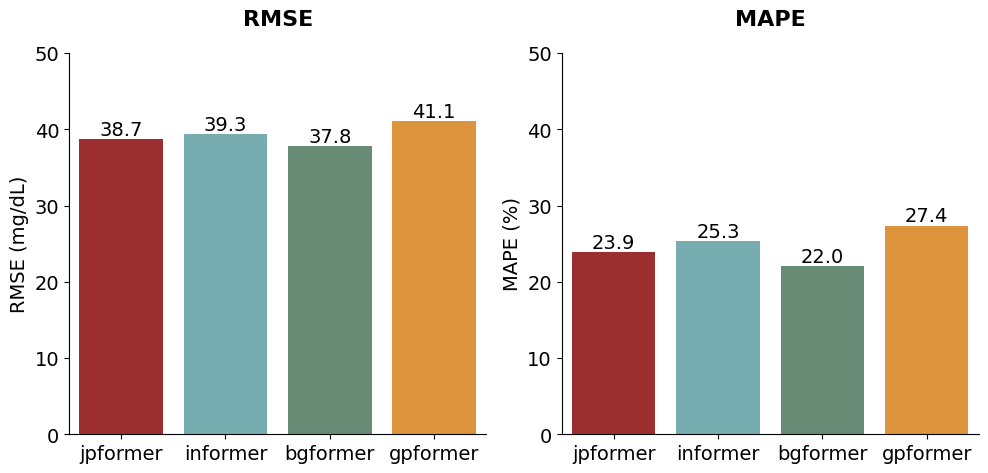

In [39]:
# Plot comparison column chart for RMSE and MAE and display in a 2x1 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Define custom colors for the models
model1_color = (173 / 255, 29 / 255, 30 / 255)  # JPFormer
model2_color = (110 / 255, 180 / 255, 186 / 255)  # Informer
model3_color = (98 / 255, 145 / 255, 117 / 255)  # BGFormer
model4_color = (248 / 255, 151 / 255, 33 / 255)  # GPFormer
# Create a color palette with the same colors
palette = [model1_color, model2_color, model3_color, model4_color]

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=rmse_mae_table, ax=axs[0], hue='Model', palette=palette, legend=False)
axs[0].set_title('RMSE', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('RMSE (mg/dL)', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label

# Plot MAPE
sns.barplot(x='Model', y='MAPE', data=rmse_mae_table, ax=axs[1], hue='Model', palette=palette, legend=False)
axs[1].set_title('MAPE', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('MAPE (%)', fontsize=14)
axs[1].set_xlabel('')  # Remove x-axis label

# Set y-axis limits and add data labels
for ax in axs:
    ax.set_ylim(0, 50)  # Adjusted to better fit the data range
    # Make tick labels larger
    ax.tick_params(axis='both', labelsize=14)
    # Add data labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=14)
    # Remove top and right borders
    sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust to make room for the title
plt.show()


In [13]:
def return_ttests(no_fe_model, fe_model, glycemic_region, model1_name="Model w/o FE", model2_name="Model w/ FE"):
    print(f"\n🔍 Running t-test for {model1_name} vs {model2_name} ({glycemic_region.capitalize()}glycaemic Range Performance):\n")

    # Copy data to avoid modifying the originals
    df1 = no_fe_model.copy()
    df2 = fe_model.copy()

    # Filter based on glycemic region
    glycemic_region = glycemic_region.lower()
    if glycemic_region == 'hypo':
        df1 = df1[df1['glycemic_region'] == 'hypo']
        df2 = df2[df2['glycemic_region'] == 'hypo']
    elif glycemic_region == 'hyper':
        df1 = df1[df1['glycemic_region'] == 'hyper']
        df2 = df2[df2['glycemic_region'] == 'hyper']
    elif glycemic_region == 'eu':
        df1 = df1[df1['glycemic_region'] == 'eu']
        df2 = df2[df2['glycemic_region'] == 'eu']
    else:
        pass  # Use all data if 'overall' or invalid

    # Calculate errors
    df1['absolute_error'] = np.abs(df1['true_glucose'] - df1['predicted_glucose'])
    df2['absolute_error'] = np.abs(df2['true_glucose'] - df2['predicted_glucose'])

    df1['squared_error'] = df1['absolute_error'] ** 2
    df2['squared_error'] = df2['absolute_error'] ** 2
    
    # Calculate percentage errors for MAPE
    df1['percentage_error'] = np.abs((df1['true_glucose'] - df1['predicted_glucose']) / df1['true_glucose']) * 100
    df2['percentage_error'] = np.abs((df2['true_glucose'] - df2['predicted_glucose']) / df2['true_glucose']) * 100

    # Use Welch's t-test (unpaired, unequal variance)
    tt_mse, p_mse = stats.ttest_ind(df1['squared_error'], df2['squared_error'], equal_var=False)
    tt_mape, p_mape = stats.ttest_ind(df1['percentage_error'], df2['percentage_error'], equal_var=False)

    # Format results
    results = pd.DataFrame({
        "Metric": ["RMSE", "MAPE"],
        "t-statistic": [tt_mse, tt_mape],
        "p-value": [p_mse, p_mape],
        "Significance (p < 0.05)": [p_mse < 0.05, p_mape < 0.05]
    })

    display(results)
    return results

In [14]:
informer_ttests = return_ttests(jpformer_full_results, informer_full_results, glycemic_region="overall", model1_name="JPFormer", model2_name="Informer")
bgformer_ttests = return_ttests(jpformer_full_results, bgformer_full_results, glycemic_region="overall", model1_name="JPFormer", model2_name="BGFormer")
gpformer_ttests = return_ttests(jpformer_full_results, gpformer_full_results, glycemic_region="overall", model1_name="JPFormer", model2_name="GPFormer")


🔍 Running t-test for JPFormer vs Informer (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-7.631979,2.313683e-14,True
1,MAPE,-3.066094,2.168806e-03,True



🔍 Running t-test for JPFormer vs BGFormer (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,11.097436,1.295659e-28,True
1,MAPE,33.062861,1.348781e-239,True



🔍 Running t-test for JPFormer vs GPFormer (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-28.711008,3.267496e-181,True
1,MAPE,-34.001462,2.908149e-253,True


## **4. CG-EGA Summary Classifications**

In [15]:
jpformer_full_results['AP'] = np.where(jpformer_full_results['CG_EGA_Class'] == 'AP', 1, 0)
informer_full_results['AP'] = np.where(informer_full_results['CG_EGA_Class'] == 'AP', 1, 0)
bgformer_full_results['AP'] = np.where(bgformer_full_results['CG_EGA_Class'] == 'AP', 1, 0)
gpformer_full_results['AP'] = np.where(gpformer_full_results['CG_EGA_Class'] == 'AP', 1, 0)

jpformer_full_results['BE'] = np.where(jpformer_full_results['CG_EGA_Class'] == 'BE', 1, 0)
informer_full_results['BE'] = np.where(informer_full_results['CG_EGA_Class'] == 'BE', 1, 0)
bgformer_full_results['BE'] = np.where(bgformer_full_results['CG_EGA_Class'] == 'BE', 1, 0)
gpformer_full_results['BE'] = np.where(gpformer_full_results['CG_EGA_Class'] == 'BE', 1, 0)

jpformer_full_results['EP'] = np.where(jpformer_full_results['CG_EGA_Class'] == 'EP', 1, 0)
informer_full_results['EP'] = np.where(informer_full_results['CG_EGA_Class'] == 'EP', 1, 0)
bgformer_full_results['EP'] = np.where(bgformer_full_results['CG_EGA_Class'] == 'EP', 1, 0)
gpformer_full_results['EP'] = np.where(gpformer_full_results['CG_EGA_Class'] == 'EP', 1, 0)

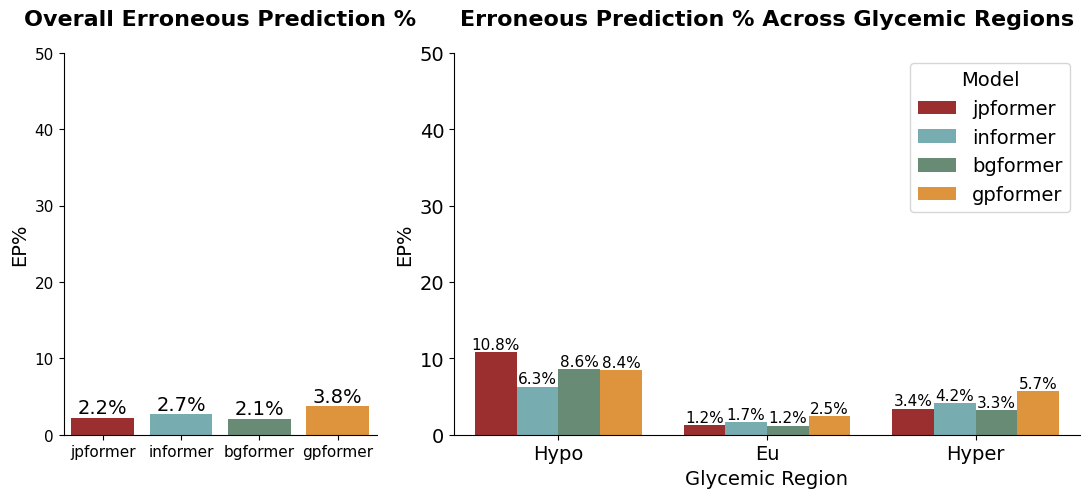

In [40]:


# Create summary tables for overall, hypo, eu, and hyper glycaemic regions
regions = ['overall', 'hypo', 'eu', 'hyper']
summary_tables = {}

for region in regions:
    # Initialize empty DataFrame with specific dtypes to avoid warning
    summary_df = pd.DataFrame({
        'Model': pd.Series(dtype='object'),
        'AP': pd.Series(dtype='int64'), 
        'BE': pd.Series(dtype='int64'), 
        'EP': pd.Series(dtype='int64'), 
        'Count': pd.Series(dtype='int64'),
        'AP_pct': pd.Series(dtype='float64'), 
        'BE_pct': pd.Series(dtype='float64'), 
        'EP_pct': pd.Series(dtype='float64')
    })
    
    # Process each model
    for model, df in zip(['jpformer', 'informer', 'bgformer', 'gpformer'], 
                        [jpformer_full_results, 
                         informer_full_results, 
                         bgformer_full_results, 
                         gpformer_full_results]):
        # Filter for region if not overall
        if region != 'overall':
            region_df = df[df['glycemic_region'] == region]
        else:
            region_df = df
            
        # Calculate counts
        ap_count = region_df['AP'].sum()
        be_count = region_df['BE'].sum()
        ep_count = region_df['EP'].sum()
        total_count = len(region_df)
        
        # Create a new row as a dictionary and append it to the DataFrame
        new_row = {
            'Model': model, 
            'AP': ap_count, 
            'BE': be_count, 
            'EP': ep_count, 
            'Count': total_count,
            'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
            'AP_pct': ap_count / total_count * 100, 
            'BE_pct': be_count / total_count * 100, 
            'EP_pct': ep_count / total_count * 100
        }
        summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Store in dictionary
    summary_tables[region] = summary_df

# Create 1x2 grid figure with custom width ratios
fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [1, 2]})

# PLOT 1: Overall EP% (left panel)
sns.barplot(
    x='Model', 
    y='EP_pct', 
    data=summary_tables['overall'], 
    ax=axs[0], 
    palette=palette,
    hue='Model',
    legend=False
)
axs[0].set_title('Overall Erroneous Prediction %', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('EP%', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].tick_params(axis='both', labelsize=11)
axs[0].set_ylim(0, 50)  # Set y-axis range from 0 to 5

# Add data labels
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height():.1f}%", 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=14)

# PLOT 2: EP% by Glycemic Region (right panel)
# Create a new dataframe that combines the regional data for plotting
regional_data = pd.concat([
    summary_tables['hypo'][['Model', 'EP_pct']].assign(Region='Hypo'),
    summary_tables['eu'][['Model', 'EP_pct']].assign(Region='Eu'),
    summary_tables['hyper'][['Model', 'EP_pct']].assign(Region='Hyper')
])

sns.barplot(
    x='Region', 
    y='EP_pct', 
    hue='Model',
    data=regional_data, 
    ax=axs[1], 
    palette=palette
)
axs[1].set_title('Erroneous Prediction % Across Glycemic Regions', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('EP%', fontsize=14)
axs[1].set_xlabel('Glycemic Region', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_ylim(0, 50)  # Set y-axis range from 0 to 40 to accommodate hypo region values

# Add data labels to the second chart
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.1f%%', fontsize=11)

# Add legend to the right plot
axs[1].legend(title='Model', fontsize=14, title_fontsize=14)

# Remove top and right borders
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
# fig.suptitle('OHIOT1DM', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()


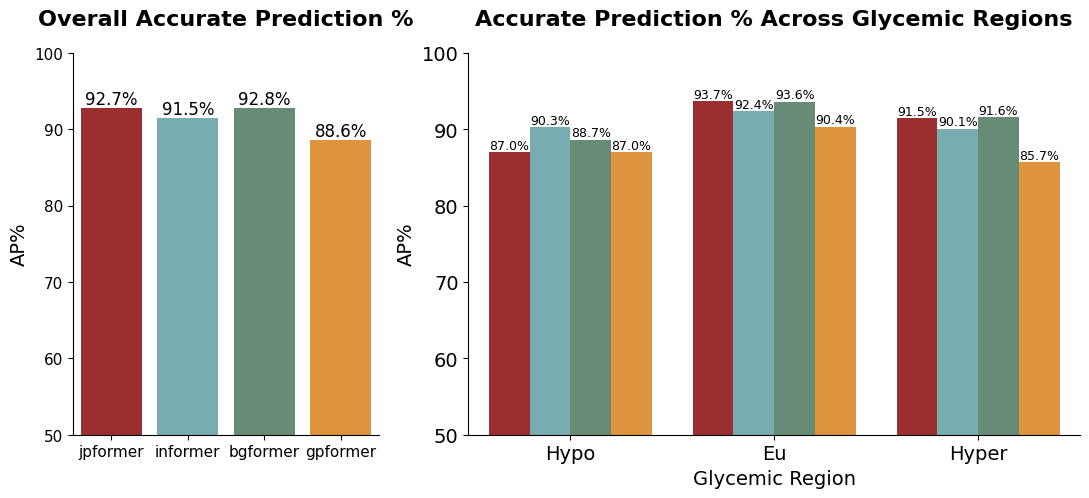

In [18]:


# Create summary tables for overall, hypo, eu, and hyper glycaemic regions
regions = ['overall', 'hypo', 'eu', 'hyper']
summary_tables = {}

for region in regions:
    # Initialize empty DataFrame with specific dtypes to avoid warning
    summary_df = pd.DataFrame({
        'Model': pd.Series(dtype='object'),
        'AP': pd.Series(dtype='int64'), 
        'BE': pd.Series(dtype='int64'), 
        'EP': pd.Series(dtype='int64'), 
        'Count': pd.Series(dtype='int64'),
        'AP_pct': pd.Series(dtype='float64'), 
        'BE_pct': pd.Series(dtype='float64'), 
        'EP_pct': pd.Series(dtype='float64')
    })
    # Process each model
    for model, df in zip(['jpformer', 'informer', 'bgformer', 'gpformer'], 
                        [jpformer_full_results, 
                         informer_full_results, 
                         bgformer_full_results, 
                         gpformer_full_results]):
        
        # Filter for region if not overall
        if region != 'overall':
            region_df = df[df['glycemic_region'] == region]
        else:
            region_df = df
            
        # Calculate counts
        ap_count = region_df['AP'].sum()
        be_count = region_df['BE'].sum()
        ep_count = region_df['EP'].sum()
        total_count = len(region_df)
        
        # Create a new row as a dictionary and append it to the DataFrame
        new_row = {
            'Model': model, 
            'AP': ap_count, 
            'BE': be_count, 
            'EP': ep_count, 
            'Count': total_count,
            'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
            'AP_pct': ap_count / total_count * 100, 
            'BE_pct': be_count / total_count * 100, 
            'EP_pct': ep_count / total_count * 100
        }
        summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Store in dictionary
    summary_tables[region] = summary_df

# Create 1x2 grid figure with custom width ratios
fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [1, 2]})

# PLOT 1: Overall AP% (left panel)
sns.barplot(
    x='Model', 
    y='AP_pct', 
    data=summary_tables['overall'], 
    ax=axs[0], 
    palette=palette,
    hue='Model',
    legend=False
)
axs[0].set_title('Overall Accurate Prediction %', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('AP%', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].tick_params(axis='both', labelsize=11)
axs[0].set_ylim(50, 100)  # Set y-axis range from 0 to 100

# Add data labels
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height():.1f}%", 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=12)

# PLOT 2: AP% by Glycemic Region (right panel)
# Create a new dataframe that combines the regional data for plotting
regional_data = pd.concat([
    summary_tables['hypo'][['Model', 'AP_pct']].assign(Region='Hypo'),
    summary_tables['eu'][['Model', 'AP_pct']].assign(Region='Eu'),
    summary_tables['hyper'][['Model', 'AP_pct']].assign(Region='Hyper')
])

sns.barplot(
    x='Region', 
    y='AP_pct', 
    hue='Model',
    data=regional_data, 
    ax=axs[1], 
    palette=palette,
    legend=False
)
axs[1].set_title('Accurate Prediction % Across Glycemic Regions', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('AP%', fontsize=14)
axs[1].set_xlabel('Glycemic Region', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_ylim(50, 100)  # Set y-axis range from 0 to 100

# Add data labels to the second chart
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.1f%%', fontsize=9)

# Add legend to the right plot


# Remove top and right borders
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
# fig.suptitle('OHIOT1DM', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()


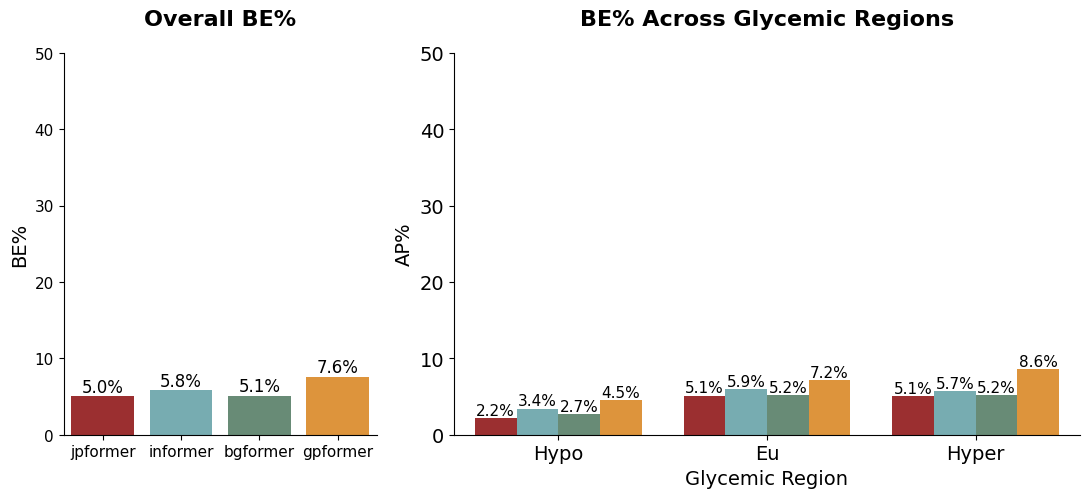

In [19]:


# Create summary tables for overall, hypo, eu, and hyper glycaemic regions
regions = ['overall', 'hypo', 'eu', 'hyper']
summary_tables = {}

for region in regions:
    # Initialize empty DataFrame with specific dtypes to avoid warning
    summary_df = pd.DataFrame({
        'Model': pd.Series(dtype='object'),
        'AP': pd.Series(dtype='int64'), 
        'BE': pd.Series(dtype='int64'), 
        'EP': pd.Series(dtype='int64'), 
        'Count': pd.Series(dtype='int64'),
        'AP_pct': pd.Series(dtype='float64'), 
        'BE_pct': pd.Series(dtype='float64'), 
        'EP_pct': pd.Series(dtype='float64')
    })
    # Process each model
    for model, df in zip(['jpformer', 'informer', 'bgformer', 'gpformer'], 
                        [jpformer_full_results, 
                         informer_full_results, 
                         bgformer_full_results, 
                         gpformer_full_results]):
        
        # Filter for region if not overall
        if region != 'overall':
            region_df = df[df['glycemic_region'] == region]
        else:
            region_df = df
            
        # Calculate counts
        ap_count = region_df['AP'].sum()
        be_count = region_df['BE'].sum()
        ep_count = region_df['EP'].sum()
        total_count = len(region_df)
        
        # Create a new row as a dictionary and append it to the DataFrame
        new_row = {
            'Model': model, 
            'AP': ap_count, 
            'BE': be_count, 
            'EP': ep_count, 
            'Count': total_count,
            'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
            'AP_pct': ap_count / total_count * 100, 
            'BE_pct': be_count / total_count * 100, 
            'EP_pct': ep_count / total_count * 100
        }
        summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Store in dictionary
    summary_tables[region] = summary_df

# Create 1x2 grid figure with custom width ratios
fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [1, 2]})

# PLOT 1: Overall AP% (left panel)
sns.barplot(
    x='Model', 
    y='BE_pct', 
    data=summary_tables['overall'], 
    ax=axs[0], 
    palette=palette,
    hue='Model',
    legend=False
)
axs[0].set_title('Overall BE%', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('BE%', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].tick_params(axis='both', labelsize=11)
axs[0].set_ylim(00, 50)  # Set y-axis range from 0 to 100

# Add data labels
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height():.1f}%", 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=12)

# PLOT 2: AP% by Glycemic Region (right panel)
# Create a new dataframe that combines the regional data for plotting
regional_data = pd.concat([
    summary_tables['hypo'][['Model', 'BE_pct']].assign(Region='Hypo'),
    summary_tables['eu'][['Model', 'BE_pct']].assign(Region='Eu'),
    summary_tables['hyper'][['Model', 'BE_pct']].assign(Region='Hyper')
])

sns.barplot(
    x='Region', 
    y='BE_pct', 
    hue='Model',
    data=regional_data, 
    ax=axs[1], 
    palette=palette,
    legend=False
)
axs[1].set_title('BE% Across Glycemic Regions', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('AP%', fontsize=14)
axs[1].set_xlabel('Glycemic Region', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_ylim(0, 50)  # Set y-axis range from 0 to 100

# Add data labels to the second chart
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.1f%%', fontsize=11)

# Add legend to the right plot


# Remove top and right borders
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
# fig.suptitle('OHIOT1DM', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()

In [20]:
def create_timepoint_ega_dataframe(df, region=None):
    # Initialize a dataframe to store results with proper data types
    result_df = pd.DataFrame(index=(np.arange(24)+1) * 5)  # timepoints (n+1) * 5
    result_df.index.name = 'timepoint'
    
    # Initialize columns for percentages, counts and total
    result_df['AP_percent'] = 0.0
    result_df['BP_percent'] = 0.0
    result_df['EP_percent'] = 0.0
    result_df['AP_count'] = 0
    result_df['BP_count'] = 0
    result_df['EP_count'] = 0
    result_df['Total_count'] = 0

    
    # Create a copy of the dataframe to avoid modifying the original
    df = df.copy()

    if region == 'hypo':
        # Filter for hypoglycemic readings only
        df = df[df['glycemic_region'] == 'hypo']
    elif region == 'hyper':
        # Filter for hyperglycemic readings only
        df = df[df['glycemic_region'] == 'hyper']
    elif region == 'eu':
        # Filter for euglycemic readings only
        df = df[df['glycemic_region'] == 'eu']
    else:
        df = df  # Use all data

    # Process each timepoint
    for timepoint in range(1,24):
        # Filter data for this timepoint
        timepoint_data = df[df['timepoint'] == timepoint]
        
        if len(timepoint_data) > 0:
            # Count occurrences of each CG_EGA_Class
            class_counts = timepoint_data['CG_EGA_Class'].value_counts()
            total_points = len(timepoint_data)
            
            # Store total count for this timepoint
            result_df.loc[(timepoint + 1) * 5, 'Total_count'] = total_points
            
            # Calculate percentages and counts for AP, BP, and EP
            for class_prefix in ['A', 'B', 'E']:
                # Find all classes that start with this letter (AP, BP, EP)
                class_matches = [c for c in class_counts.index if c.startswith(class_prefix)]
                count = sum([class_counts[c] for c in class_matches if c in class_counts])
                
                # Store count
                result_df.loc[(timepoint + 1) * 5, f'{class_prefix}P_count'] = count
                
                # Store percentage
                result_df.loc[(timepoint + 1) * 5, f'{class_prefix}P_percent'] = float((count / total_points) * 100)

        timepoint_data.reset_index(drop=True, inplace=True)

    result_df['AP:EP'] = result_df['AP_count'] / result_df['EP_count']


    # result_df = result_df.drop(index=0)
    # result_df = result_df.reset_index()
    # result_df['timepoint'] = result_df['timepoint'].astype(int)

    
    return result_df






In [41]:
def return_ep_ph_chart(model1, model2, model3, model4, glycemic_region):
    # Process data for each model using the create_timepoint_ega_dataframe function
    model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
    model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)
    model3_timepoint_table = create_timepoint_ega_dataframe(model3, glycemic_region)
    model4_timepoint_table = create_timepoint_ega_dataframe(model4, glycemic_region)

    # Plot the AP:EP ratio for both models
    plt.figure(figsize=(10, 6))

    # Define custom colors for the models
    model1_color = (173 / 255, 29 / 255, 30 / 255)  # JPFormer
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # Infomer
    model3_color = (98 / 255, 145 / 255, 117 / 255)  # BGFormer
    model4_color = (248 / 255, 151 / 255, 33 / 255)  # GPFormer

    # Skip the first timepoint (index 5) by starting from the second entry in the table
    plt.plot(model1_timepoint_table.index[1:], model1_timepoint_table['EP_percent'][1:], 
             label='jpformer', marker='o', linestyle='-', markersize=4, 
             color=model1_color)
    plt.plot(model2_timepoint_table.index[1:], model2_timepoint_table['EP_percent'][1:], 
             label='informer', marker='o', linestyle='-', markersize=4, 
             color=model2_color)
    plt.plot(model3_timepoint_table.index[1:], model3_timepoint_table['EP_percent'][1:],
             label='bgformer', marker='o', linestyle='-', markersize=4, 
             color=model3_color)
    plt.plot(model4_timepoint_table.index[1:], model4_timepoint_table['EP_percent'][1:],
             label='gpformer', marker='o', linestyle='-', markersize=4, 
             color=model4_color)

    # Add titles and labels
    plt.title(f'EP% by Prediction Horizon', 
              fontsize=16, fontweight='bold', ha='center', pad=20)
    plt.xlabel('Prediction Horizon (mins)', fontsize=14, labelpad=5, ha='center')
    plt.ylabel('EP Percentage', fontsize=14, labelpad=5)
    plt.xticks(range(0, 121, 30), fontsize=14)
    plt.yticks(fontsize=14)

    # Format legend
    legend = plt.legend(title='Model', fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.15), 
                        ncol=2, frameon=False)

    legend.get_title().set_fontsize(14)

    # Remove gridlines and styling
    plt.grid(False)
    plt.ylim(0, 20)  
    sns.despine()  # Remove top and right borders
    plt.tight_layout()
    plt.show()


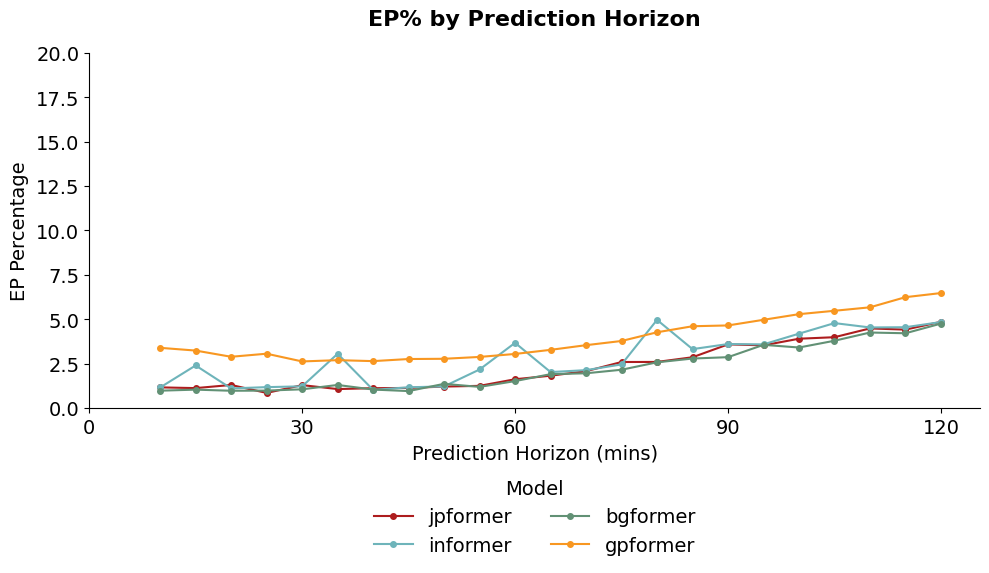

In [42]:
# Call the function with the appropriate arguments'
return_ep_ph_chart(model1=jpformer_full_results,
                model2=informer_full_results,
                model3=bgformer_full_results,
                model4=gpformer_full_results,
                glycemic_region='overall')

In [43]:
def return_ap_ph_chart(model1, model2, model3, model4, glycemic_region):
    # Process data for each model using the create_timepoint_ega_dataframe function
    model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
    model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)
    model3_timepoint_table = create_timepoint_ega_dataframe(model3, glycemic_region)
    model4_timepoint_table = create_timepoint_ega_dataframe(model4, glycemic_region)

    # Plot the AP_percent for all models, skipping the first timepoint (index 5)
    plt.figure(figsize=(10, 6))

    # Define custom colors for the models
    model1_color = (173 / 255, 29 / 255, 30 / 255)  # JPFormer
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # Infomer
    model3_color = (98 / 255, 145 / 255, 117 / 255)  # BGFormer
    model4_color = (248 / 255, 151 / 255, 33 / 255)  # GPFormer

    # Skip the first timepoint (index 5) by starting from the second entry in the table
    plt.plot(model1_timepoint_table.index[1:], model1_timepoint_table['AP_percent'][1:], 
             label='jpformer', marker='o', linestyle='-', markersize=4, 
             color=model1_color)
    plt.plot(model2_timepoint_table.index[1:], model2_timepoint_table['AP_percent'][1:], 
             label='informer', marker='o', linestyle='-', markersize=4, 
             color=model2_color)
    plt.plot(model3_timepoint_table.index[1:], model3_timepoint_table['AP_percent'][1:],
             label='bgformer', marker='o', linestyle='-', markersize=4, 
             color=model3_color)
    plt.plot(model4_timepoint_table.index[1:], model4_timepoint_table['AP_percent'][1:],
             label='gpformer', marker='o', linestyle='-', markersize=4, 
             color=model4_color)

    # Add titles and labels
    plt.title(f'AP% by Prediction Horizon', 
              fontsize=16, fontweight='bold', ha='center', pad=20)
    plt.xlabel('Prediction Horizon (mins)', fontsize=14, labelpad=5, ha='center')
    plt.ylabel('AP Percentage', fontsize=14, labelpad=5), 
    plt.xticks(range(0, 121, 30), fontsize=14)
    plt.yticks(fontsize=14)

    # Format legend
    legend = plt.legend(title='Model', fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.15), 
                        ncol=2, frameon=False)

    legend.get_title().set_fontsize(14)

    # Remove gridlines and styling
    plt.grid(False)
    plt.ylim(80, 100)  
    sns.despine()  # Remove top and right borders
    plt.tight_layout()
    plt.show()


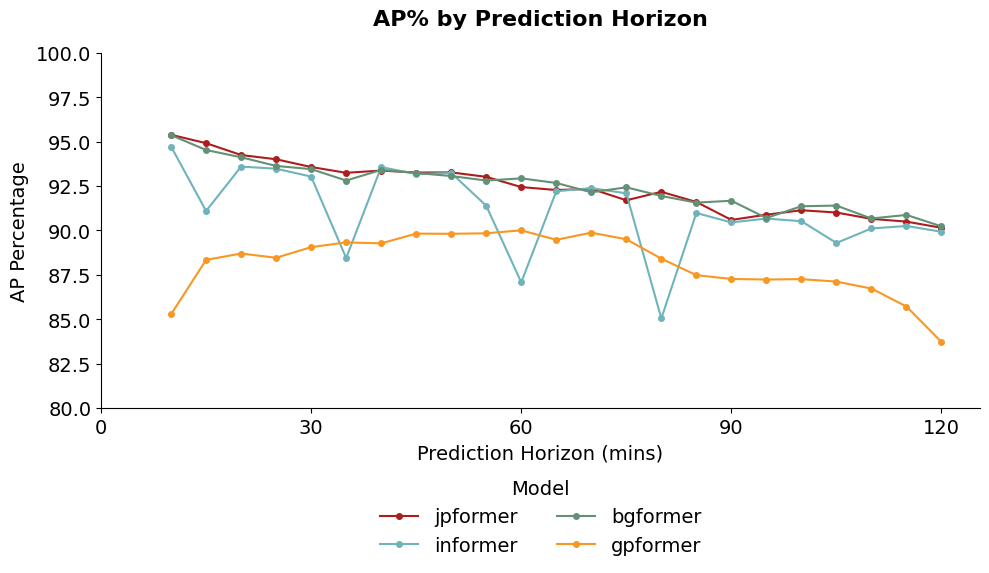

In [44]:
# Call the function with the appropriate arguments'
return_ap_ph_chart(model1=jpformer_full_results,
                model2=informer_full_results,
                model3=bgformer_full_results,
                model4=gpformer_full_results,
                glycemic_region='overall')

In [46]:
def return_ep_timepoint_summary(model1, model1_name, model2, model2_name, model3, model3_name, 
                             model4, model4_name, glycemic_region):
    timepoints = [30, 60, 90, 120]

    # Create a dictionary to store DataFrames for each timepoint
    timepoint_dfs = {}

    # For each timepoint, create a DataFrame with rows from all six models
    for t in timepoints:
        # Process data for each model using the create_timepoint_ega_dataframe function
        model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
        model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)
        model3_timepoint_table = create_timepoint_ega_dataframe(model3, glycemic_region)
        model4_timepoint_table = create_timepoint_ega_dataframe(model4, glycemic_region)

        # Get data from all models for this timepoint and prepare as dataframe rows
        model_data = [
            {'Model': model1_name,
             'AP_percent': model1_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model1_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model1_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model1_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model1_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model1_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model1_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model1_timepoint_table.loc[t, 'AP_percent'] / model1_timepoint_table.loc[t, 'EP_percent'] if model1_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan},
            
            {'Model': model2_name,
             'AP_percent': model2_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model2_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model2_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model2_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model2_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model2_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model2_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model2_timepoint_table.loc[t, 'AP_percent'] / model2_timepoint_table.loc[t, 'EP_percent'] if model2_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan},
            
            {'Model': model3_name,
             'AP_percent': model3_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model3_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model3_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model3_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model3_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model3_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model3_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model3_timepoint_table.loc[t, 'AP_percent'] / model3_timepoint_table.loc[t, 'EP_percent'] if model3_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan},
            
            {'Model': model4_name,
             'AP_percent': model4_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model4_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model4_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model4_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model4_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model4_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model4_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model4_timepoint_table.loc[t, 'AP_percent'] / model4_timepoint_table.loc[t, 'EP_percent'] if model4_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan}
        ]
        
        # Create DataFrame directly from the list of dictionaries
        timepoint_df = pd.DataFrame(model_data)
        
        # Store in dictionary
        timepoint_dfs[t] = timepoint_df

    # Create a figure to visualize EP percentages across timepoints
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Define custom colors for the models
    colors = [
        (173 / 255, 29 / 255, 30 / 255),  # Model 1
        (110 / 255, 180 / 255, 186 / 255),  # Model 2
        (98 / 255, 145 / 255, 117 / 255),  # Model 3
        (248 / 255, 151 / 255, 33 / 255),  # Model 4
    ]

    # Plot bar charts for each timepoint
    for i, t in enumerate(timepoints):
        sns.barplot(
            x='Model', 
            y='EP_percent', 
            data=timepoint_dfs[t], 
            ax=axs[i], 
            palette=colors,
            hue='Model',
            dodge=False
        )
        axs[i].set_title(f'Prediction Horizon: {t} mins', fontsize=16, fontweight='bold', pad=20)
        axs[i].set_ylabel('EP Percentage', fontsize=14)
        axs[i].set_xlabel('')
        axs[i].tick_params(axis='both', labelsize=14)
        axs[i].set_ylim(0, 50)  # Set consistent y-axis limits
        
        # Add data labels
        for p in axs[i].patches:
            axs[i].annotate(f"{p.get_height():.1f}%", 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=14)
        
        # Remove top and right borders
        sns.despine(ax=axs[i])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, hspace=0.4)  # Increased space between title and plots
    plt.show()

    # Display the comparison tables
    for t in timepoints:
        print(f"\nPrediction Horizon: {t} minutes")
        display(timepoint_dfs[t])

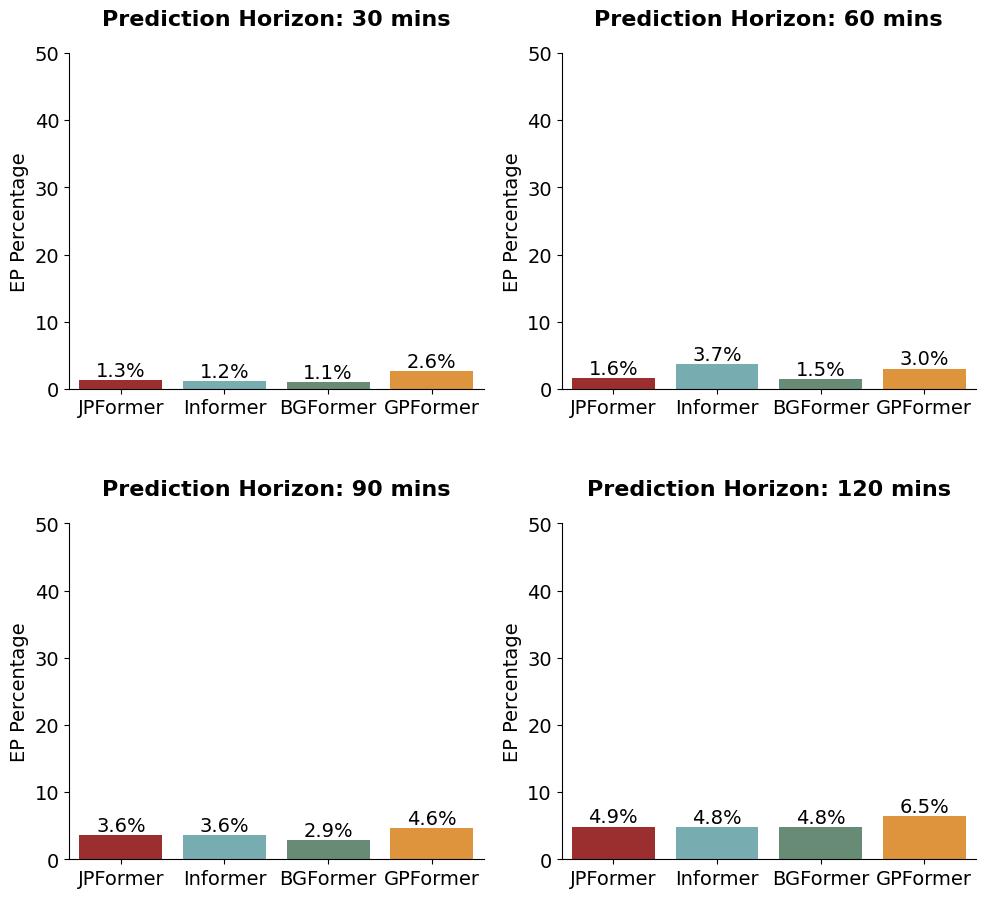


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,93.569161,5.142857,1.287982,20632,1134,284,22050,72.647887
1,Informer,93.029478,5.750567,1.219955,20513,1268,269,22050,76.256506
2,BGFormer,93.451247,5.496599,1.052154,20606,1212,232,22050,88.818966
3,GPFormer,89.056689,8.321995,2.621315,19637,1835,578,22050,33.974048



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,92.439909,5.941043,1.619048,20383,1310,357,22050,57.095238
1,Informer,87.074830,9.256236,3.668934,19200,2041,809,22050,23.733004
2,BGFormer,92.929705,5.555556,1.514739,20491,1225,334,22050,61.350299
3,GPFormer,90.004535,6.952381,3.043084,19846,1533,671,22050,29.576751



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,90.589569,5.827664,3.582766,19975,1285,790,22050,25.284810
1,Informer,90.448980,5.950113,3.600907,19944,1312,794,22050,25.118388
2,BGFormer,91.668934,5.469388,2.861678,20213,1206,631,22050,32.033281
3,GPFormer,87.265306,8.086168,4.648526,19242,1783,1025,22050,18.772683



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,90.145125,5.002268,4.852608,19877,1103,1070,22050,18.576636
1,Informer,89.922902,5.238095,4.839002,19828,1155,1067,22050,18.582943
2,BGFormer,90.226757,5.020408,4.752834,19895,1107,1048,22050,18.983779
3,GPFormer,83.714286,9.814059,6.471655,18459,2164,1427,22050,12.935529


In [47]:
return_ep_timepoint_summary(jpformer_full_results, 'JPFormer',
                         informer_full_results, 'Informer',
                         bgformer_full_results, 'BGFormer',
                         gpformer_full_results, 'GPFormer',
                         glycemic_region='overall')

In [48]:
def return_ap_timepoint_summary(model1, model1_name, model2, model2_name, model3, model3_name, 
                             model4, model4_name, glycemic_region):
    timepoints = [30, 60, 90, 120]

    # Create a dictionary to store DataFrames for each timepoint
    timepoint_dfs = {}

    # For each timepoint, create a DataFrame with rows from all four models
    for t in timepoints:
        # Process data for each model using the create_timepoint_ega_dataframe function
        model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
        model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)
        model3_timepoint_table = create_timepoint_ega_dataframe(model3, glycemic_region)
        model4_timepoint_table = create_timepoint_ega_dataframe(model4, glycemic_region)

        model_data = [
            {'Model': model1_name,
             'AP_percent': model1_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model1_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model1_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model1_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model1_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model1_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model1_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model1_timepoint_table.loc[t, 'AP_percent'] / model1_timepoint_table.loc[t, 'EP_percent'] if model1_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan},
            
            {'Model': model2_name,
             'AP_percent': model2_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model2_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model2_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model2_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model2_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model2_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model2_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model2_timepoint_table.loc[t, 'AP_percent'] / model2_timepoint_table.loc[t, 'EP_percent'] if model2_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan},
            
            {'Model': model3_name,
             'AP_percent': model3_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model3_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model3_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model3_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model3_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model3_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model3_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model3_timepoint_table.loc[t, 'AP_percent'] / model3_timepoint_table.loc[t, 'EP_percent'] if model3_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan},
            
            {'Model': model4_name,
             'AP_percent': model4_timepoint_table.loc[t, 'AP_percent'],
             'BP_percent': model4_timepoint_table.loc[t, 'BP_percent'],
             'EP_percent': model4_timepoint_table.loc[t, 'EP_percent'],
             'AP_count': model4_timepoint_table.loc[t, 'AP_count'],
             'BP_count': model4_timepoint_table.loc[t, 'BP_count'],
             'EP_count': model4_timepoint_table.loc[t, 'EP_count'],
             'Total_count': model4_timepoint_table.loc[t, 'Total_count'],
             'AP:EP': model4_timepoint_table.loc[t, 'AP_percent'] / model4_timepoint_table.loc[t, 'EP_percent'] if model4_timepoint_table.loc[t, 'EP_percent'] != 0 else np.nan}
        ]
        
        # Create DataFrame directly from the list of dictionaries
        timepoint_df = pd.DataFrame(model_data)
        
        # Store in dictionary
        timepoint_dfs[t] = timepoint_df

    # Create a figure to visualize EP percentages across timepoints
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Define custom colors for the models
    colors = [
        (173 / 255, 29 / 255, 30 / 255),  # Model 1
        (110 / 255, 180 / 255, 186 / 255),  # Model 2
        (98 / 255, 145 / 255, 117 / 255),  # Model 3
        (248 / 255, 151 / 255, 33 / 255),  # Model 4
    ]

    # Plot bar charts for each timepoint
    for i, t in enumerate(timepoints):
        sns.barplot(
            x='Model', 
            y='AP_percent', 
            data=timepoint_dfs[t], 
            ax=axs[i], 
            palette=colors,
            hue='Model',
            dodge=False
        )
        axs[i].set_title(f'Prediction Horizon: {t} mins', fontsize=16, fontweight='bold', pad=20)
        axs[i].set_ylabel('AP Percentage', fontsize=14)
        axs[i].set_xlabel('')
        axs[i].tick_params(axis='both', labelsize=14)
        axs[i].set_ylim(50, 100)  # Set y-axis limit appropriate for EP percentages
        
        # Add data labels
        for p in axs[i].patches:
            axs[i].annotate(f"{p.get_height():.1f}%", 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=14)
        
        # Remove top and right borders
        sns.despine(ax=axs[i])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, hspace=0.4)  # Increased space between title and plots
    plt.show()

    # Display the comparison tables
    for t in timepoints:
        print(f"\nPrediction Horizon: {t} minutes")
        display(timepoint_dfs[t])


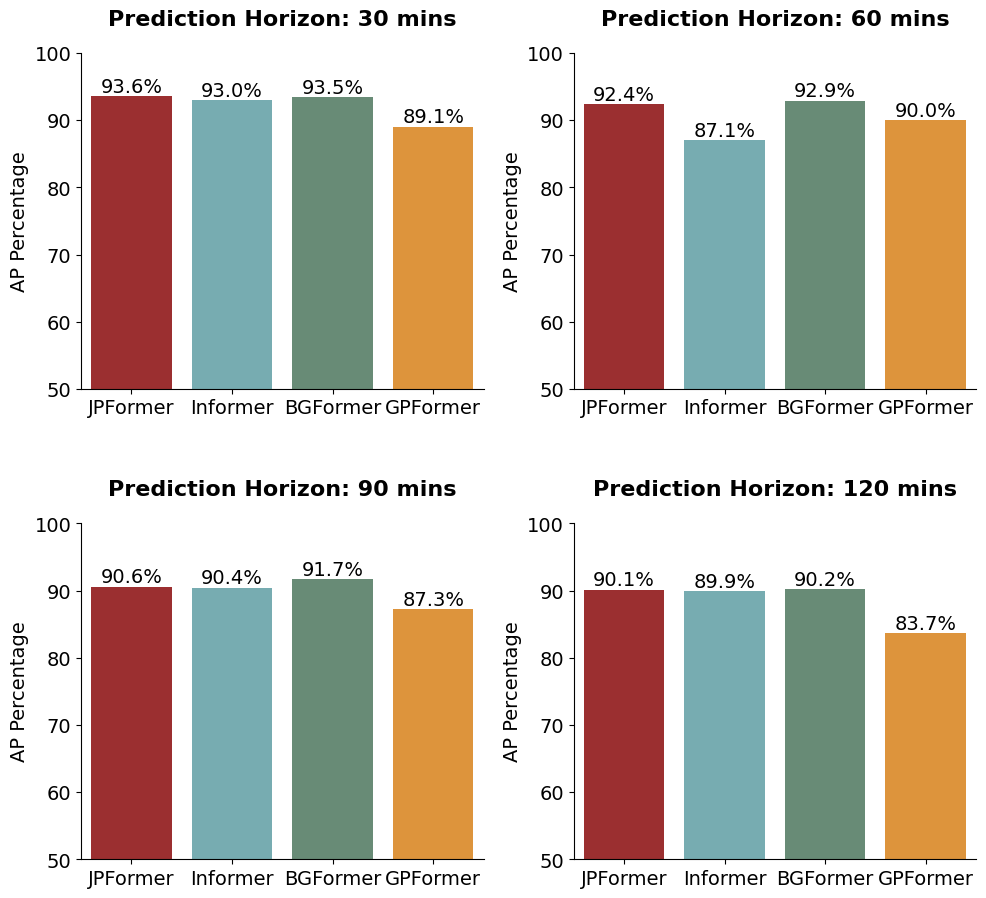


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,93.569161,5.142857,1.287982,20632,1134,284,22050,72.647887
1,Informer,93.029478,5.750567,1.219955,20513,1268,269,22050,76.256506
2,BGFormer,93.451247,5.496599,1.052154,20606,1212,232,22050,88.818966
3,GPFormer,89.056689,8.321995,2.621315,19637,1835,578,22050,33.974048



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,92.439909,5.941043,1.619048,20383,1310,357,22050,57.095238
1,Informer,87.074830,9.256236,3.668934,19200,2041,809,22050,23.733004
2,BGFormer,92.929705,5.555556,1.514739,20491,1225,334,22050,61.350299
3,GPFormer,90.004535,6.952381,3.043084,19846,1533,671,22050,29.576751



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,90.589569,5.827664,3.582766,19975,1285,790,22050,25.284810
1,Informer,90.448980,5.950113,3.600907,19944,1312,794,22050,25.118388
2,BGFormer,91.668934,5.469388,2.861678,20213,1206,631,22050,32.033281
3,GPFormer,87.265306,8.086168,4.648526,19242,1783,1025,22050,18.772683



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,JPFormer,90.145125,5.002268,4.852608,19877,1103,1070,22050,18.576636
1,Informer,89.922902,5.238095,4.839002,19828,1155,1067,22050,18.582943
2,BGFormer,90.226757,5.020408,4.752834,19895,1107,1048,22050,18.983779
3,GPFormer,83.714286,9.814059,6.471655,18459,2164,1427,22050,12.935529


In [49]:
return_ap_timepoint_summary(jpformer_full_results, 'JPFormer',
                         informer_full_results, 'Informer',
                         bgformer_full_results, 'BGFormer',
                         gpformer_full_results, 'GPFormer',
                         glycemic_region='overall')

### **4.1. Statistical Analysis**

In [34]:
# Function to compute Cramér's V
def cramers_v(chi2, n, contingency_table):
    """Computes Cramér's V effect size from the chi-square test."""
    min_dim = min(np.shape(contingency_table)) - 1  # Min(row-1, col-1)
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan

# Function to interpret Cramér's V effect size
def interpret_cramers_v(v_value):
    """Provides qualitative interpretation of Cramér's V."""
    if pd.isna(v_value):  
        return "Not Enough Data"
    elif v_value < 0.1:
        return "Negligible Effect"
    elif v_value < 0.3:
        return "Small Effect"
    elif v_value < 0.5:
        return "Medium Effect"
    else:
        return "Large Effect"

# Chi-square analysis function
def return_chi_square_analysis(model1, model2, glycemic_region, model1_name, model2_name):
    glycemic_region = glycemic_region.lower()
    data_dist_chi_square_results = []

    print(f"\n Running Chi-Square test for {model1_name} vs {model2_name} ({glycemic_region.capitalize()}glycaemic Range Performance):\n")

    # Copy data to avoid modifying the originals
    df1 = model1.copy()
    df2 = model2.copy()

    # Filter based on glycemic region
    if glycemic_region == 'hypo':
        df1 = df1[df1['glycemic_region'] == 'hypo']
        df2 = df2[df2['glycemic_region'] == 'hypo']
    elif glycemic_region == 'hyper':
        df1 = df1[df1['glycemic_region'] == 'hyper']
        df2 = df2[df2['glycemic_region'] == 'hyper']
    elif glycemic_region == 'eu':
        df1 = df1[df1['glycemic_region'] == 'eu']
        df2 = df2[df2['glycemic_region'] == 'eu']
    else:
        pass  # Use all data

    # Calculate class counts
    df1_counts = df1['CG_EGA_Class'].value_counts()
    df2_counts = df2['CG_EGA_Class'].value_counts()
    
    # Totals
    df1_total = df1_counts.sum()
    df2_total = df2_counts.sum()

    # Contingency table
    contingency_table = [
        [df1_counts.get('AP', 0), df1_counts.get('BE', 0), df1_counts.get('EP', 0)],
        [df2_counts.get('AP', 0), df2_counts.get('BE', 0), df2_counts.get('EP', 0)],
    ]

    # Percentages
    df1_percent = {
        'AP': (df1_counts.get('AP', 0) / df1_total) * 100 if df1_total else 0,
        'BE': (df1_counts.get('BE', 0) / df1_total) * 100 if df1_total else 0,
        'EP': (df1_counts.get('EP', 0) / df1_total) * 100 if df1_total else 0
    }
    df2_percent = {
        'AP': (df2_counts.get('AP', 0) / df2_total) * 100 if df2_total else 0,
        'BE': (df2_counts.get('BE', 0) / df2_total) * 100 if df2_total else 0,
        'EP': (df2_counts.get('EP', 0) / df2_total) * 100 if df2_total else 0
    }

    # Chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Cramér's V
    n = np.sum(contingency_table)
    cramers_v_value = cramers_v(chi2, n, contingency_table)
    cramers_v_interpretation = interpret_cramers_v(cramers_v_value)

    # Store result
    data_dist_chi_square_results.append({
        "Model 1": f"{model1_name} ({glycemic_region.capitalize()})",
        "Model 2": f"{model2_name} ({glycemic_region.capitalize()})",
        "Chi2 Statistic": chi2,
        "p-value": p_value,
        "Significant": p_value < 0.05,
        "Cramér's V": cramers_v_value,
        "Cramér's V Interpretation": cramers_v_interpretation
    })

    # Display results
    print(f"\n  χ² = {chi2:.3f}, p = {p_value:.5f}, "
          f"{'Significant' if p_value < 0.05 else 'Not Significant'} | "
          f"Cramér's V = {cramers_v_value:.3f} ({cramers_v_interpretation})\n")

    # Contingency table (readable)
    table_data = pd.DataFrame({
        "AP (Accurate Predictions)": [f"{df1_counts.get('AP', 0)} ({df1_percent['AP']:.2f}%)", 
                                     f"{df2_counts.get('AP', 0)} ({df2_percent['AP']:.2f}%)"],
        "BE (Benign Errors)": [f"{df1_counts.get('BE', 0)} ({df1_percent['BE']:.2f}%)", 
                              f"{df2_counts.get('BE', 0)} ({df2_percent['BE']:.2f}%)"],
        "EP (Erroneous Predictions)": [f"{df1_counts.get('EP', 0)} ({df1_percent['EP']:.2f}%)", 
                                      f"{df2_counts.get('EP', 0)} ({df2_percent['EP']:.2f}%)"]
    }, index=[model1_name, model2_name])

    print("\nContingency Table:")
    display(table_data)
    print(f"\n{'_ _'*30}\n")
    return pd.DataFrame(data_dist_chi_square_results)

In [50]:
overall_chi2_base_no_dout = return_chi_square_analysis(jpformer_full_results, informer_full_results, 'overall', 'jpformer', 'inforer')
overall_chi2_base_high_dout = return_chi_square_analysis(jpformer_full_results, gpformer_full_results, 'overall', 'jpformer', 'gpformer')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(jpformer_full_results, bgformer_full_results, 'overall', 'jpformer', 'bgformer')


 Running Chi-Square test for jpformer vs inforer (Overallglycaemic Range Performance):


  χ² = 558.269, p = 0.00000, Significant | Cramér's V = 0.023 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,490742 (92.73%),26594 (5.03%),11864 (2.24%)
inforer,484225 (91.50%),30755 (5.81%),14220 (2.69%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs gpformer (Overallglycaemic Range Performance):


  χ² = 5323.670, p = 0.00000, Significant | Cramér's V = 0.071 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,490742 (92.73%),26594 (5.03%),11864 (2.24%)
gpformer,469026 (88.63%),40266 (7.61%),19908 (3.76%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs bgformer (Overallglycaemic Range Performance):


  χ² = 25.191, p = 0.00000, Significant | Cramér's V = 0.005 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,490742 (92.73%),26594 (5.03%),11864 (2.24%)
bgformer,490964 (92.77%),27067 (5.11%),11169 (2.11%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _



In [51]:
overall_chi2_base_no_dout = return_chi_square_analysis(jpformer_full_results, informer_full_results, 'hypo', 'jpformer', 'inforer')
overall_chi2_base_high_dout = return_chi_square_analysis(jpformer_full_results, gpformer_full_results, 'hypo', 'jpformer', 'gpformer')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(jpformer_full_results, bgformer_full_results, 'hypo', 'jpformer', 'bgformer')


 Running Chi-Square test for jpformer vs inforer (Hypoglycaemic Range Performance):


  χ² = 195.613, p = 0.00000, Significant | Cramér's V = 0.086 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,11415 (87.00%),291 (2.22%),1415 (10.78%)
inforer,11843 (90.26%),450 (3.43%),828 (6.31%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs gpformer (Hypoglycaemic Range Performance):


  χ² = 141.096, p = 0.00000, Significant | Cramér's V = 0.073 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,11415 (87.00%),291 (2.22%),1415 (10.78%)
gpformer,11419 (87.03%),594 (4.53%),1108 (8.44%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs bgformer (Hypoglycaemic Range Performance):


  χ² = 41.585, p = 0.00000, Significant | Cramér's V = 0.040 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,11415 (87.00%),291 (2.22%),1415 (10.78%)
bgformer,11634 (88.67%),359 (2.74%),1128 (8.60%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _



In [52]:
overall_chi2_base_no_dout = return_chi_square_analysis(jpformer_full_results, informer_full_results, 'eu', 'jpformer', 'inforer')
overall_chi2_base_high_dout = return_chi_square_analysis(jpformer_full_results, gpformer_full_results, 'eu', 'jpformer', 'gpformer')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(jpformer_full_results, bgformer_full_results, 'eu', 'jpformer', 'bgformer')


 Running Chi-Square test for jpformer vs inforer (Euglycaemic Range Performance):


  χ² = 499.780, p = 0.00000, Significant | Cramér's V = 0.028 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,306902 (93.67%),16754 (5.11%),3982 (1.22%)
inforer,302583 (92.35%),19489 (5.95%),5566 (1.70%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs gpformer (Euglycaemic Range Performance):


  χ² = 2715.344, p = 0.00000, Significant | Cramér's V = 0.064 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,306902 (93.67%),16754 (5.11%),3982 (1.22%)
gpformer,296066 (90.36%),23491 (7.17%),8081 (2.47%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs bgformer (Euglycaemic Range Performance):


  χ² = 2.039, p = 0.36082, Not Significant | Cramér's V = 0.002 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,306902 (93.67%),16754 (5.11%),3982 (1.22%)
bgformer,306747 (93.62%),16975 (5.18%),3916 (1.20%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _



In [53]:
overall_chi2_base_no_dout = return_chi_square_analysis(jpformer_full_results, informer_full_results, 'hyper', 'jpformer', 'inforer')
overall_chi2_base_high_dout = return_chi_square_analysis(jpformer_full_results, gpformer_full_results, 'hyper', 'jpformer', 'gpformer')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(jpformer_full_results, bgformer_full_results, 'hyper', 'jpformer', 'bgformer')


 Running Chi-Square test for jpformer vs inforer (Hyperglycaemic Range Performance):


  χ² = 228.192, p = 0.00000, Significant | Cramér's V = 0.025 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,172425 (91.50%),9549 (5.07%),6467 (3.43%)
inforer,169799 (90.11%),10816 (5.74%),7826 (4.15%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs gpformer (Hyperglycaemic Range Performance):


  χ² = 3116.123, p = 0.00000, Significant | Cramér's V = 0.091 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,172425 (91.50%),9549 (5.07%),6467 (3.43%)
gpformer,161541 (85.72%),16181 (8.59%),10719 (5.69%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


 Running Chi-Square test for jpformer vs bgformer (Hyperglycaemic Range Performance):


  χ² = 11.117, p = 0.00385, Significant | Cramér's V = 0.005 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
jpformer,172425 (91.50%),9549 (5.07%),6467 (3.43%)
bgformer,172583 (91.58%),9733 (5.17%),6125 (3.25%)



_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _

